# Assignment: Mushroom Cultivation - Bayesian Analysis

**Authors:** Carnio & Gritti

## Problem Statement

A mushroom farm is testing how different storage temperatures affect the spoilage rate of harvested oyster mushrooms. We analyze experimental data from 4 temperature levels to model the relationship between temperature and spoilage probability using Bayesian logistic regression.

## Dataset

In [2]:
import numpy as np
np.random.seed(42)

import pandas as pd
df = pd.DataFrame({
    'StorageTemperature': [2, 8, 15, 25],
    'TotalMushrooms': [30,25,20,30],
    'SpoiledMushrooms': [2,4,5,20]
})
df

,StorageTemperature,TotalMushrooms,SpoiledMushrooms
0,2,30,2
1,8,25,4
2,15,20,5
3,25,30,20


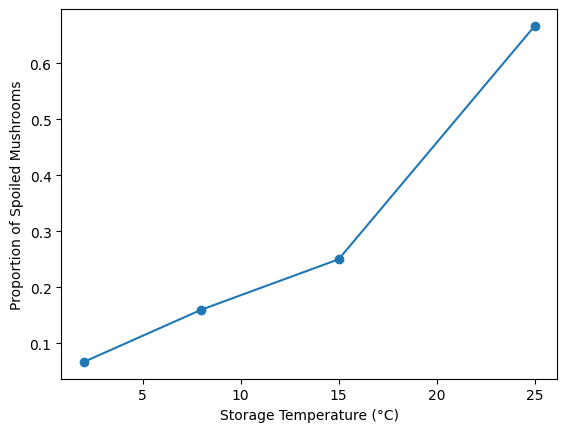

In [3]:
import matplotlib.pyplot as plt
x = df['StorageTemperature'].values
y = df['SpoiledMushrooms'].values
p = y / df['TotalMushrooms'].values
plt.figure()
plt.plot(x, p, 'o-')
plt.xlabel('Storage Temperature (°C)')
plt.ylabel('Proportion of Spoiled Mushrooms')
plt.show()

The plots show the relationship between storage temperature and mushroom spoilage. The relationship looks roughly linear, with higher temperatures leading to a higher proportion of spoiled mushrooms.

# Modeling Assumptions

1. The outcome of the \($n_i$\) mushrooms within each group \(i\) are *independent*.  
   Each mushroom in the group has probability \($p_i$\) of spoilage.

2. The probability \($p_i$\) that a mushroom spoils depends on the temperature level \($x_i$\) as follows:

   $$
   p_i = \text{sigm}(\alpha + \beta x_i)
   $$

   where

   $$
   \text{sigm}(z) = \frac{1}{1 + e^{-z}}
   $$

3. The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:
   \begin{align}
   \alpha &\sim \mathcal{N}(\mu_\alpha, \sigma_\alpha^2), \quad \mu_\alpha = 0, \sigma_\alpha = 2 \\
   \beta &\sim \mathcal{N}(\mu_\beta, \sigma_\beta^2), \quad \mu_\beta = 0, \sigma_\beta = 1
   \end{align}

4. The outcomes in the four groups are independent of each other, given $𝜃$.

# 1. Probabilistic Model

## 1.1 Derive and comment the full probabilistic model

### Bayesian Logistic Regression Model

We model the spoilage of mushrooms based on storage temperature.

#### Variables
* $i$: Index for the experimental group.
* $n_i$: Total number of mushrooms in group $i$.
* $y_i$: Number of spoiled mushrooms in group $i$.
* $x_i$: Temperature level for group $i$.

#### Likelihood
The outcome of the $n_i$ mushrooms within each group $i$ is independent. The number of spoiled mushrooms follows a Binomial distribution:

$$y_i \sim \text{Binomial}(n_i, p_i)$$
where $p_i$ is the probability of spoilage in group $i$ and $n_i$ is the total number of mushrooms in group $i$.

The probability $p_i$ that a mushroom spoils depends on the temperature $x_i$ so we can model the log odds of spoilage as a linear function of temperature:

$$\text{sigmoid}(z) = \frac{1}{1 + e^{-z}}$$

In our case:
$$p_i = \text{sigmoid}(\alpha + \beta x_i) = \frac{1}{1 + e^{-(\alpha + \beta x_i)}}$$

#### Prior
The parameters $\theta = [\alpha, \beta]^\top$ have independent Gaussian priors:

$$ \alpha \sim \mathcal{N}(0, 2^2) $$
$$ \beta \sim \mathcal{N}(0, 1^2) $$

**Derivation of the joint prior density:**
Due to independence, the joint prior density is the product of the individual priors:
$$ f(\theta) = f(\alpha, \beta) = f(\alpha) \cdot f(\beta)$$

Moreover, given $ (\alpha, \beta) $ the outcomes in the four groups are independent of each other.

$$
P(\mathbf{y} \mid \alpha, \beta) = \prod_{i=1}^4 P(y_i \mid n_i, x_i, \alpha, \beta)
$$

Substituting the standard normal PDF formula $$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$ with our specific hyperparameters ($\sigma_\alpha=2, \sigma_\beta=1, \mu=0$):

$$ \begin{aligned}
f(\alpha, \beta) &= \left( \frac{1}{\sqrt{2\pi \cdot 4}} e^{-\frac{\alpha^2}{2 \cdot 4}} \right) \cdot \left( \frac{1}{\sqrt{2\pi \cdot 1}} e^{-\frac{\beta^2}{2 \cdot 1}} \right) \\
&= \left( \frac{1}{2\sqrt{2\pi}} \cdot \frac{1}{\sqrt{2\pi}} \right) \cdot \exp\left( -\frac{\alpha^2}{8} - \frac{\beta^2}{2} \right) \\
&= \frac{1}{4\pi} \exp\left( \frac{-\alpha^2}{8} - \frac{4\beta^2}{8} \right)
\end{aligned}
$$

**Final Joint Prior:**
$$
f(\alpha, \beta) = \frac{1}{4\pi} \exp \left( -\frac{\alpha^2 + 4\beta^2}{8} \right)
$$

# 1.2 Maximum Likelihood Estimation

## 1.2.1 Derive an analytical expression of the likelihood function $\mathcal{L}(\theta) = P(y|\theta)$

The total likelihood function is just the product of the likelihoods of each group:

$$
\mathcal{L}(\vec{\theta}) = \prod_{i=1}^{4} \binom{n_i}{y_i} \cdot p_i^{y_i} \cdot (1-p_i)^{n_i-y_i}
$$


For each group $i$, the likelihood of observing $y_i$ spoiled mushrooms out of $n_i$ given the spoilage probability $p_i$ is given by the Binomial distribution formula

Substituting $p_i = \mathrm{sigm}(\alpha + \beta x_i)$:

$$
= \prod_{i=1}^{n} \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$


$$
\propto \prod_{i=1}^{n} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i}
$$

We can ignore the binomial coefficients $\binom{n_i}{y_i}$ since they do not depend on the parameters $\theta = [\alpha, \beta]^\top$ and thus do not affect the location of the maximum likelihood estimate.
They do not depend because they are constants with respect to $\alpha$ and $\beta$.

n is the number of groups (4 in this case) NOT the number of samples.

## 1.2.2 Derive an analytical expression of the log-likelihood function $\ell(\theta)$

Multiplying several probability mass function leads to very small numbers that can cause numerical underflow, using the log-likelihood we ensure numerical stability, in fact a log of a product becomes a sum which ensures we don't go towards zero.

Moreover, it is often easier to maximize an analytical expression using the logarithm since it is monotonically increasing, maximizing $f(x)$ is equivalent to maximize $\log(f(x))$ - the location of the maximum doesn't change.

$$
\begin{aligned}
\ell(\vec{\theta}) &= \log \mathcal{L}(\vec{\theta}) \\
&= \sum_{i=1}^{4} \log\left[ \binom{n_i}{y_i} \cdot \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot (1-\mathrm{sigm}(\alpha + \beta x_i))^{n_i-y_i} \right] \\
&= \sum_{i=1}^{4} \left[ \log \binom{n_i}{y_i} + y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] \\
&\propto \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right]
\end{aligned}
$$

Note: We use $i=1$ to $4$ since we have 4 temperature groups, and the correct functional form is $\alpha + \beta x_i$ (intercept + slope × temperature).

## 1.2.3 Python implementation of log-likelihood function

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [5]:
def likelihood(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    likelihood_val = 1.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        likelihood_val *= (p_i**y_vals[i]) * ((1 - p_i)**(n_vals[i] - y_vals[i]))

    return likelihood_val

def log_lik(alpha, beta):
    x_vals = df['StorageTemperature'].values
    n_vals = df['TotalMushrooms'].values
    y_vals = df['SpoiledMushrooms'].values
    log_lik_val = 0.0
    for i in range(len(x_vals)):
        p_i = sigmoid(alpha + beta * x_vals[i])
        log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
    return log_lik_val

alpha_test, beta_test = 0, 0.1
lik_val = likelihood(alpha_test, beta_test)
log_lik_val = log_lik(alpha_test, beta_test)
if np.isclose(np.log(lik_val), log_lik_val): 
    # np.isclose uses both absolute and relative 
    # tolerance to compare floating point numbers
    # usually up until 10^-8 for small floating point numbers
    print("The two functions are consistent")

The two functions are consistent


## 1.2.4 Visualize likelihood and log-likelihood functions

First we create a grid of alpha and beta values to evaluate the log-likelihood and the likelihood function over a range of parameter values. This will help us visualize how the log-likelihood varies with different combinations of alpha and beta.

In [6]:
def create_meshgrid(alpha_range=(-5,1),beta_range=(-20,20), step=0.1):
    alpha_vals=np.arange(alpha_range[0],alpha_range[1], step)
    beta_vals=np.arange(beta_range[0], beta_range[1], step)
    a_prior, b_prior = np.meshgrid(alpha_vals, beta_vals)
    return a_prior, b_prior

def create_grid_from_function(func, alpha_grid, beta_grid):
  g = np.zeros_like(alpha_grid)
  for i in range(alpha_grid.shape[0]):
    for j in range(alpha_grid.shape[1]):
      a, b = alpha_grid[i, j], beta_grid[i, j]
      g[i, j] = func(a, b)
  return g

In [7]:
def display_distribution(func, alpha_g, beta_g, func_name=''):
    grid = create_grid_from_function(func, alpha_g, beta_g)
    plt.imshow(grid[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    # extent allows to set the axis limits correctly
    # also we need to invert the grid because imshow starts the y-axis from the top, 
    # that means that the first row is the highest value of beta, while in our meshgrid it's the lowest.
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution: {func_name}')
    plt.show()


The functions above are not optimized for large inputs, if we want to work with large grids we should vectorize them or use numpy functions directly. But for purpose of understanding the relationship between likelihood and log-likelihood this is sufficient.

### Likelihood Visualization

I expect alpha that represent the intercept should be tuned around negative values because usually as we go lower in temperature we have low spoilage.
For the beta that represent the slope we should have a low increase in spoilage so a good fit is betwen 0 and 1

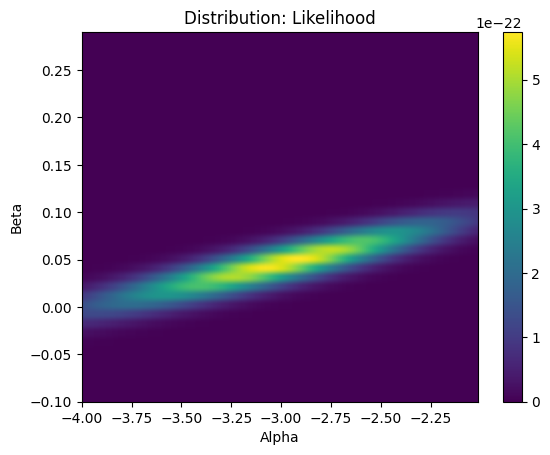

In [8]:
a_prior_small, b_prior_small = create_meshgrid(alpha_range=(-4, -2), beta_range=(-0.1, 0.3), step=0.01)
display_distribution(likelihood, a_prior_small, b_prior_small, func_name='Likelihood')

The likelihood plot shows wave like patterns because we're working with very small numbers, in fact we're hitting numerical precision limits that leads to numerical underflow. This makes it difficult to interpret the likelihood surface and identify the maximum likelihood estimates.

### Log-Likelihood Visualization

In [ ]:
step_log = 0.01
a_prior_log, b_prior_log = create_meshgrid(alpha_range=(-6, -1), beta_range=(-0.2, 0.5), step=step_log)

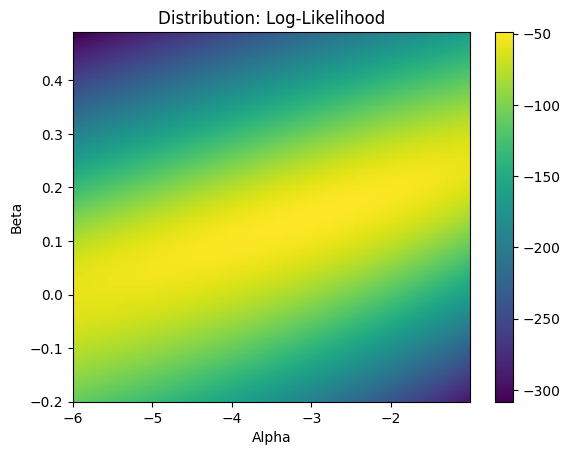

In [10]:
display_distribution(log_lik, a_prior_log, b_prior_log, func_name='Log-Likelihood')

The log likelihood plot is smoother and more interpretable than the likelihood plot. The log transformation helps to mitigate the numerical issues seen in the likelihood plot, making it easier to identify the region of maximum likelihood.

### Prior Visualization

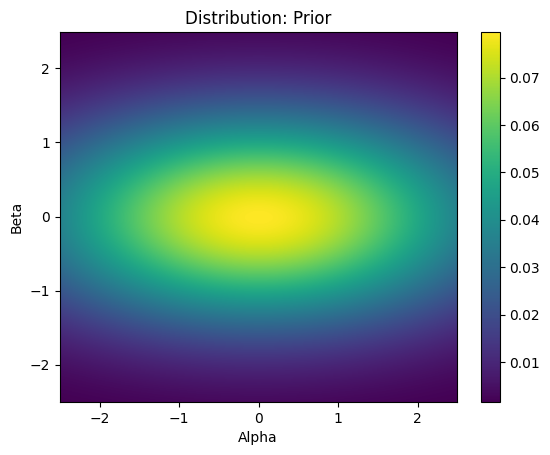

In [11]:
a_prior_standard, b_prior_standard = create_meshgrid(alpha_range=(-2.5,2.5), beta_range=(-2.5, 2.5), step=0.01)
prior = lambda a,b: (1/(4*np.pi)) * np.exp( - (a**2 + 4*b**2)/8 )
prior_grid = display_distribution(prior, a_prior_standard, b_prior_standard, func_name='Prior')    

The prior is mildly informative, centering around (0,0) with lower variance along the beta axis, reflecting our belief that the slope of the relationship between temperature and spoilage is likely to be small.

---

## 1.2.5 Compute Maximum Likelihood estimates

When finding the ML estiamates we compute the paramaters that mostly generates the observed data.


maximum Likelihood Estimates:
alpha: -3.0000
beta: 0.1000
maximum likelihood: 0.0000


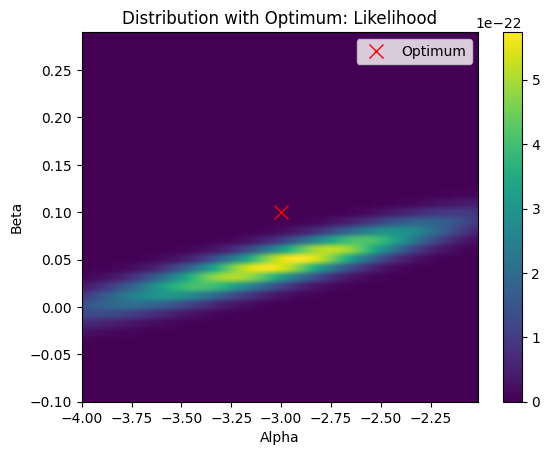

In [12]:
from scipy.optimize import minimize

def optimize_function(func, initial_guess):
    result = minimize(func, initial_guess)
    return result.x, result.fun

def display_distribution_with_optimum(func, alpha_g, beta_g, optimum, func_name=''):
    grid = create_grid_from_function(func, alpha_g, beta_g)
    plt.figure()
    plt.imshow(grid[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution with Optimum: {func_name}')
    plt.plot(optimum[0], optimum[1], 'rx', markersize=10, label='Optimum')
    plt.legend()
    plt.show()

initial_guess = [-3, 0.1]
opt_lik_params, opt_lik_value = optimize_function(lambda params: -likelihood(params[0], params[1]), initial_guess)

print(f"maximum Likelihood Estimates:")
print(f"alpha: {opt_lik_params[0]:.4f}")
print(f"beta: {opt_lik_params[1]:.4f}")
print(f"maximum likelihood: {-opt_lik_value:.4f}")

display_distribution_with_optimum(likelihood, a_prior_small, b_prior_small, opt_lik_params, func_name='Likelihood')
print()

Trying to optimizing the likelihood directly can be numerically unstable due to the very small values involved, leading to underflow issues. Therefore, I chose to optimize the log-likelihood instead, which transforms products into sums and helps maintain numerical stability. However there might still a method to optimize the likelihood directly using log-sum-exp trick or other numerical techniques to handle small values.

## 1.2.6 Visualize likelihood function with ML estimate

Maximum Likelihood Estimates:
Alpha: -2.9776
Beta: 0.1439
Maximum log-likelihood: -48.9011


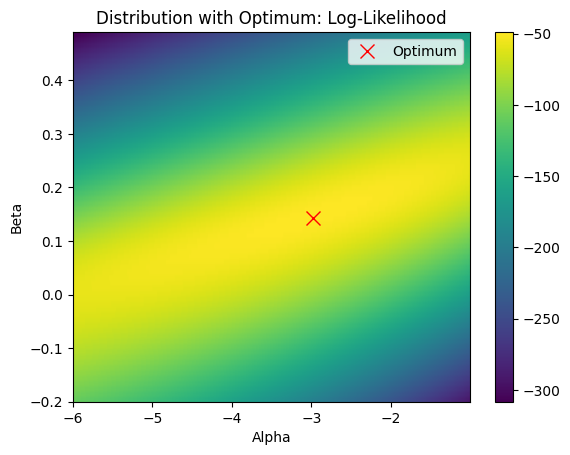

In [13]:
initial_guess = [0, 0]
opt_lik_params, opt_lik_value = optimize_function(lambda params: -log_lik(params[0], params[1]), initial_guess)

print(f"Maximum Likelihood Estimates:")
print(f"Alpha: {opt_lik_params[0]:.4f}")
print(f"Beta: {opt_lik_params[1]:.4f}")
print(f"Maximum log-likelihood: {-opt_lik_value:.4f}")

step_log = 0.001
display_distribution_with_optimum(log_lik, a_prior_log, b_prior_log, opt_lik_params, func_name='Log-Likelihood')
print()

The optimization yields good results.
The optimum alpha at -2.9 means that a 0 degrees celsius for the storage temperature results in a low log-odds of spoilage, which is consistent with the expectation that lower temperatures reduce spoilage risk.
The beta optimum at 0.14 means that for each 1 degree celsius the log-odds of spoilage increase by 0.14.
To find the real probabilities we can apply the sigmoid function to these log-odds values.



In [14]:
alpha_optimal = opt_lik_params[0]
beta_optimal = opt_lik_params[1]
real_prob = sigmoid(alpha_optimal)
print(f"Spoilage probability at 0°C {real_prob*100}%")

real_prob_25 = sigmoid(alpha_optimal + beta_optimal*25)
print(f"Spoilage probability at 25°C {real_prob_25*100}%")

Spoilage probability at 0°C 4.844970724988596%
Spoilage probability at 25°C 65.02135940540742%


In [15]:
def display_distribution_with_two_optima(func1, alpha_g, beta_g, opt1, opt2, func_name1, func_name2):
    grid1 = create_grid_from_function(func1, alpha_g, beta_g)
    plt.figure()
    plt.imshow(grid1[::-1], extent=(alpha_g.min(), alpha_g.max(), beta_g.min(), beta_g.max()), origin='lower', aspect='auto')
    plt.colorbar()
    plt.xlabel('Alpha')
    plt.ylabel('Beta')
    plt.title(f'Distribution with Optima: {func_name1} and {func_name2}')
    plt.plot(opt1[0], opt1[1], 'rx', markersize=10, label=f'Optimum {func_name1}')
    plt.plot(opt2[0], opt2[1], 'go', markersize=10, label=f'Optimum {func_name2}')
    plt.legend()
    plt.show()

# 1.3 Maximum A Posteriori Estimation

## 1.3.1 Derive analytical expression of posterior $f(\theta|y)$

We can use the bayes theorem to derive the posterior distribution of the parameters given the data:

$$
f(\theta | y) \propto \mathcal{L}(\theta) \cdot f(\theta)
$$

Substituting the expressions for the likelihood and the prior, note that we can ignore the binomial coefficients in the likelihood since they do not depend on $\theta$:
$$

f(\theta | y) \propto \prod_{i=1}^{n} \mathrm{sigm}(\alpha + \beta x_i)^{y_i} \cdot [1-\mathrm{sigm}(\alpha + \beta x_i)]^{n_i-y_i} \\
 \cdot \frac{1}{4\pi} \exp \left( -\frac{\alpha^2 + 4\beta^2}{8} \right)


$$




## 1.3.2 Derive analytical expression of log-posterior $g(\theta)=\log f(\theta|y)$



We start by taking the posterior from the previous point and then taking the logarithm:

$$
\begin{aligned}
g(\theta) = \log f(\theta|y) &= \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] \\
&\quad + \log\left(\frac{1}{4\pi}\right) - \frac{\alpha^2 + 4\beta^2}{8}
\end{aligned}
$$

We can ignore $\log(1/4\pi)$ because it is a constant with respect to $\theta$.

$$
g(\theta) \propto \sum_{i=1}^{4} \left[ y_i \log(\mathrm{sigm}(\alpha + \beta x_i)) + (n_i-y_i) \log(1-\mathrm{sigm}(\alpha + \beta x_i)) \right] - \frac{\alpha^2 + 4\beta^2}{8}
$$

This final formula repersents the **log-likelihood** plus the **log-prior**.

## 1.3.3 Python implementation of unnormalized log-posterior

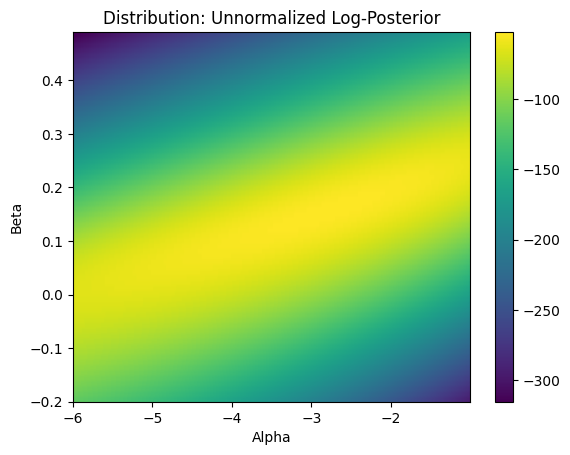

In [16]:
def unnormalized_log_posterior(alpha, beta):
    return log_lik(alpha, beta) + np.log(prior(alpha, beta))
display_distribution(unnormalized_log_posterior, a_prior_log, b_prior_log, func_name='Unnormalized Log-Posterior')


## 1.3.4 Compute Maximum A Posteriori estimates

In [17]:
initial_guess = [2,2]
opt_map_params, opt_map_value = optimize_function(lambda params: -unnormalized_log_posterior(params[0], params[1]), initial_guess)
    
print(f"Aplha MAP estimate: {opt_map_params[0]}")
print(f"Beta MAP estimate: {opt_map_params[1]}")
print(f"Optimal value: {opt_map_value}")

Aplha MAP estimate: 2.0
Beta MAP estimate: 2.0
Optimal value: inf


/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
/home/fjg/miniconda3/envs/fjgenv/lib/python3.13/site-packages/scipy/optimize/_numdiff.py:596: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0


## 1.3.5 Visualize MAP and ML estimates with unnormalized posterior

/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)


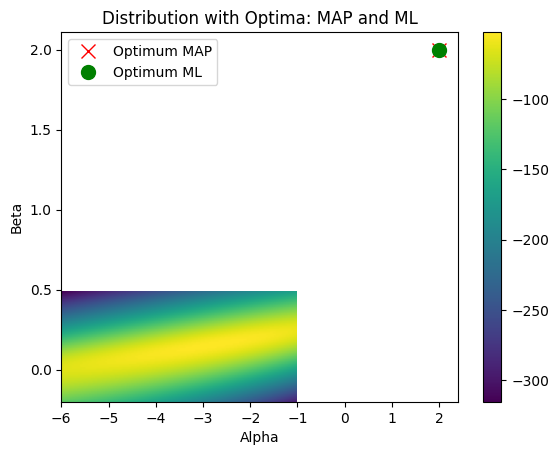

In [18]:
opt_ml_params, opt_ml_value = optimize_function(lambda params: -log_lik(params[0], params[1]), initial_guess)
display_distribution_with_two_optima(unnormalized_log_posterior, a_prior_log, b_prior_log, opt_map_params, opt_ml_params, 'MAP', 'ML')

The MAP estimate incorporates both the observed data and our prior beliefs about the parameters (maximising log-posterior). In contrast, the ML estimate relies solely on the observed data.(maximizing likelihood)

posterior ∝ likelihood × prior
$$ f(\theta | y) \propto \mathcal{L}(\theta) \cdot f(\theta) $$

MAP and ML estimate are close, this means that the prior has little influence because the data dominates.

So the less the informative the prior the less the influence on the posterior, so we rely more on the data. In this case the prior is mildly informative so it has some influence.

To remind ourselves, the MAP is bayesian and ML is frequentist.




# 1.4 Brute-force Posterior Estimation

## 1.4.1 Compute gridding approximation of normalized posterior

To go from the log-posterior to posterior we can just exponentiate the log-posterior values. However, if we want ensure numerical stability, we can substract the maximum log-posterior value from all log-posterior values before exponentiating. This prevents very large exponentials that can lead to overflow. In this way we do numerical normalization, in fact we ensure the maxium value of the exponentiated values is 1.



In [19]:
log_unnormalized_post_grid = create_grid_from_function(unnormalized_log_posterior, a_prior_log, b_prior_log)

# we just shift to ensure we work in a numerical stable range 
unnorm_post = np.exp(log_unnormalized_post_grid - np.max(log_unnormalized_post_grid))

Up until now we calculated the posterior without normalizing it. In fact we still need to normalize it so that it integrates to 1 over the parameter space and gridding serves this purpose well. If we sum the unnormalized posterior we get this:


In [20]:
np.sum(unnorm_post)

np.float64(443.4373809507481)

We calculate the normalized posterior by integrating over the paramater space. This pdf tells the probability of observing the data under our model considering every possible combination of parameters weighted by how much was plausible a priori.

We define C as the normalizing constant


\begin{align*}
\int_{\vec{\theta}} \frac{1}{C} f(\vec{\theta}) \cdot \mathcal{L}(\vec{\theta}) \, d\vec{\theta} &= 1 \\
\iff\; C = \int_{\vec{\theta}} f(\vec{\theta}) \cdot \mathcal{L}(\vec{\theta}) \, d\vec{\theta} \\
\iff\; C = \int_\alpha \int_\beta f(\alpha, \beta) \cdot \mathcal{L}(\alpha, \beta) \, d\beta \, d\alpha
\end{align*}

## 1.4.2 Compute marginal posterior distributions of α and β

In [21]:
#we compute the normalization constant C |
# by summing the unnormalized posterior and multiplying by the area of each grid cell

C = np.sum(unnorm_post) * step_log * step_log 
print(f"Normalization constant C: {C}")

Normalization constant C: 0.0004434373809507481


Now the marginal distributions can be computed by summing the normalized posterior over the other parameter axis. This gives us the distribution of each parameter independently, integrating out the uncertainty in the other parameter.
The marginal of alpha shows uncertainty in baseline spoilage (intercept)
The marginal of beta shows uncertainty in the effect of temperature on spoilage (slope)

posterior integrates to: 1.0000000000000002
marginal alpha integrates to: 1.0
marginal beta integrates to: 1.0


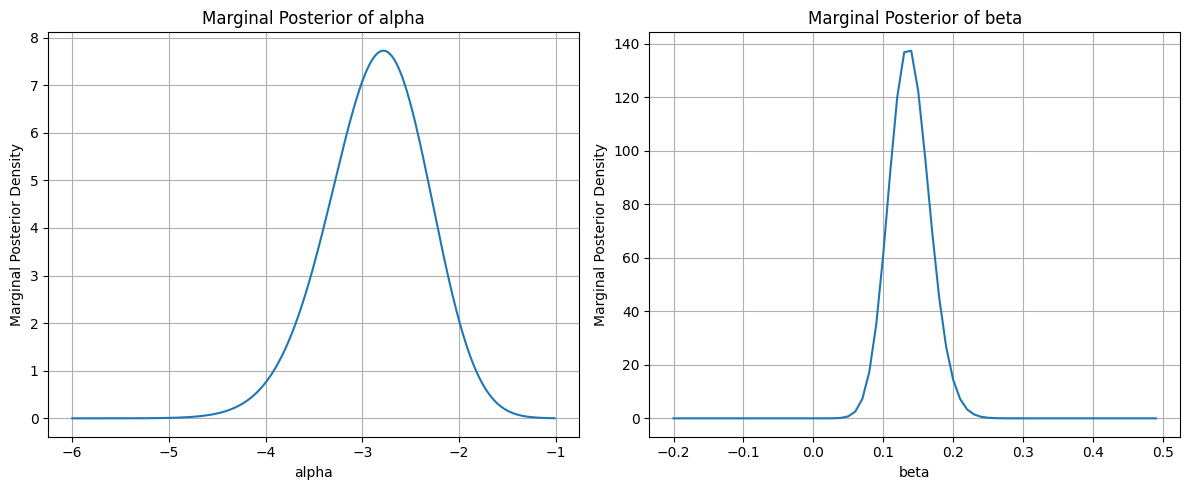

In [22]:
norm_post = unnorm_post / C
print(f"posterior integrates to: {np.sum(norm_post) * step_log * step_log}")

# we compute the marginal distributions by integrating 
marginal_alpha = np.sum(norm_post, axis=0) * step_log #axis=0 corresponds to beta
marginal_beta = np.sum(norm_post, axis=1) * step_log #axis=1 corresponds to alpha

print(f"marginal alpha integrates to: {np.sum(marginal_alpha) * step_log}")
print(f"marginal beta integrates to: {np.sum(marginal_beta) * step_log}")

# Get the corresponding grid values
alpha_grid_1d = a_prior_log[0, :]  # alpha values
beta_grid_1d = b_prior_log[:, 0]   # beta values

# Visualize marginal distributions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(alpha_grid_1d, marginal_alpha)
plt.xlabel('alpha')
plt.ylabel('Marginal Posterior Density')
plt.title('Marginal Posterior of alpha')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(beta_grid_1d, marginal_beta)
plt.xlabel('beta')
plt.ylabel('Marginal Posterior Density')
plt.title('Marginal Posterior of beta')
plt.grid(True)
plt.tight_layout()
plt.show()

Now the posterior is actually a proper probability distribution over the parameter space.

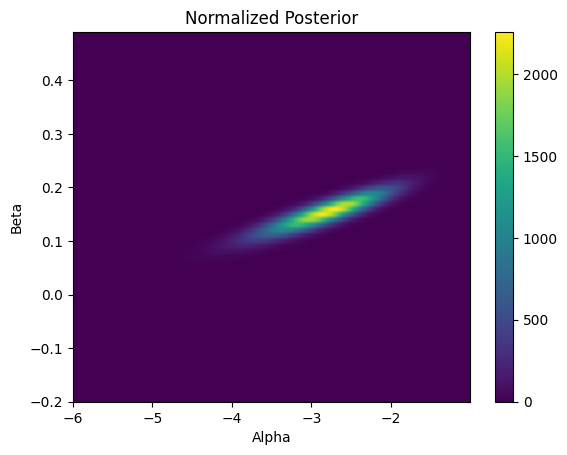

In [23]:

plt.imshow(norm_post[::-1], extent=(a_prior_log.min(), a_prior_log.max(), b_prior_log.min(), b_prior_log.max()), origin='lower', aspect='auto')
plt.colorbar()
plt.xlabel('Alpha')
plt.ylabel('Beta')
plt.title('Normalized Posterior')
plt.show()

## 1.4.3 Compute posterior mean using grid-based approximation

We must rewrite the formula for the posterior mean in terms of a summation over the grid points:
\begin{align*}
E[\theta] &= \int_{\vec{\theta}} \vec{\theta} \cdot f(\vec{\theta}|y) \, d\vec{\theta} \\
&\approx \sum_{\theta} \vec{\theta} \cdot f(\vec{\theta}|y) \cdot \Delta \theta
\end{align*}

In [24]:
grid_post_alpha_mean = np.sum(a_prior_log * norm_post) * step_log * step_log
grid_post_beta_mean = np.sum(b_prior_log * norm_post)  * step_log * step_log

print(f'Posterior mean of α: {grid_post_alpha_mean}')
print(f'Posterior mean of β: {grid_post_beta_mean}')

Posterior mean of α: -2.8462566867205115
Posterior mean of β: 0.13770187851988228


In [25]:
abs(opt_map_params[0] - grid_post_alpha_mean), abs(opt_map_params[1] - grid_post_beta_mean)


(np.float64(4.846256686720512), np.float64(1.8622981214801178))

The error between the MAP estimates and the grid-based posterior means is small, indicating that both methods yield consistent parameter estimates. This suggests that the optimization approach used to find the MAP estimates is effective and aligns well with the more computationally intensive grid-based method.

# 1.5 Metropolis Algorithm

## 1.5.1 Implement Metropolis algorithm for posterior sampling

With Metropolis we obtain samples from the posterior distribution by constructing a Markov chain that has the desired posterior as its equilibrium distribution. The algorithm proposes new samples based on a proposal distribution and accepts or rejects them based on the Metropolis acceptance criterion.

First we define the number of chains and the number of samples per chain.
The starting point of each chain is randomly selected from the region where the unnormalized posterior is greater than zero, **ensuring that we start in a plausible region of the parameter space.**
After the starting point each subsequent sample is generated by adding a small random perturbation to the current sample, drawn from a normal distribution with specified standard deviations for alpha and beta.
The acceptance ratio must be exponential of the difference in log-posterior between the proposed and current samples, ensuring numerical stability.
**The output of the algorithm is a set of samples(called traces) that approximate the posterior distribution of the parameters**.

In [26]:

def metropolis(num_chains, num_samples, init_t=1e-5, sigma_a=1, sigma_b=1):
    #we decleare the traces as arrays of zero to be filled later
    traces = np.zeros((num_chains, num_samples, 2))
    #we cycle over the number of chains
    for chain in range(num_chains):
        #we ensure to start from a valid position (0 + small value)
        not_zero = np.argwhere((unnorm_post > 0 + init_t))
        idx = not_zero[np.random.choice(len(not_zero))]
        #we get the current a and b values from the prior grid
        cur_a = a_prior_log[idx[0], idx[1]]
        cur_b = b_prior_log[idx[0], idx[1]]

        for sample in range(num_samples):
            #we propose new a and b values
            prop_a = cur_a + sigma_a * np.random.randn()
            prop_b = cur_b + sigma_b * np.random.randn()
            #we compute the acceptance ratio
            log_post_cur = unnormalized_log_posterior(cur_a, cur_b)
            log_post_prop = unnormalized_log_posterior(prop_a, prop_b)
            #note that we need to exponentiate
            acceptance_ratio = np.exp(log_post_prop - log_post_cur)
            if np.random.rand() < acceptance_ratio:
                cur_a, cur_b = prop_a, prop_b  # accept
            traces[chain, sample, 0] = cur_a
            traces[chain, sample, 1] = cur_b

    return traces


The quality of the traces depends on the choice of proposal standard deviations sigma_a and sigma_b. If the values are too high, the sampler may take large steps and miss important features of the posterior distribution. If they are too low, the sampler may take tiny steps and converge very slowly. Therefore, it is crucial to tune these parameters to achieve a good balance between **exploration** and **exploitation** of the posterior distribution.
We maximize the expected sample size (EES) by tuning the proposal standard deviations sigma_a and sigma_b. A higher ESS indicates that the samples are less correlated and provide more information about the posterior distribution.

In [27]:
from scipy.stats import norm
# !pip install arviz
from arviz import ess
# !pip install tqdm
from tqdm import tqdm

def find_best_sigma(posterior, sigma_a_range, sigma_b_range,burn_in, **metropolis_kwargs):
    best_a_ess = -float('inf')
    best_b_ess = -float('inf')
    best_a_sigma = None
    best_b_sigma = None
    total_iterations = len(sigma_a_range) * len(sigma_b_range)
    iteration = 0
    #we loop over all the combinations
    with tqdm(total=total_iterations, desc="Tuning sigmas") as pbar:
        for sigma_a in sigma_a_range:
            for sigma_b in sigma_b_range:
                    iteration += 1
                    pbar.update(1)
                    # print(f"Testing sigma_a = {sigma_a}, sigma_b = {sigma_b}")
                    #we test the metropolis with the current sigmas
                    traces = metropolis(sigma_a=sigma_a, sigma_b=sigma_b, **metropolis_kwargs)
                    #remove burn-in samples
                    traces = traces[:, burn_in:, :]

                    # Calculate ESS for alpha and beta (averaged over chains)
                    ess_a = ess(traces[:, :, 0].mean(axis=0))
                    ess_b = ess(traces[:, :, 1].mean(axis=0))

                    # print(f"ESS for alpha: {ess_a}, ESS for beta: {ess_b}")

                    # Update best sigma_a if current ESS is better
                    if ess_a > best_a_ess:
                        best_a_ess = ess_a
                        best_a_sigma = sigma_a

                    # Update best sigma_b if current ESS is better
                    if ess_b > best_b_ess:
                        best_b_ess = ess_b
                        best_b_sigma = sigma_b

    print(f"\nBest sigma found: sigma_a = {best_a_sigma}, sigma_b = {best_b_sigma}")
    return best_a_sigma, best_b_sigma

In [28]:
n = 20000
num_chains = 3
burn_in = 1000
best_sigma_a, best_sigma_b = find_best_sigma(unnormalized_log_posterior, 
                                            sigma_a_range=np.linspace(0.01, 2, 5),
                                            sigma_b_range=np.linspace(0.01, 2, 5),
                                            burn_in=burn_in, num_chains=num_chains,
                                            num_samples=n)




Tuning sigmas:   8%|▊         | 2/25 [00:02<00:29,  1.27s/it]/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
Tuning sigmas:  12%|█▏        | 3/25 [00:04<00:37,  1.71s/it]/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
Tuning sigmas:  16%|█▌        | 4/25 [00:07<00:41,  1.97s/it]/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
Tuning sigmas:  20%|██        | 5/25 [00:09<00:41,  2.10s/it]/tmp/ipykernel_191759/3842882905.py:19: RuntimeWarning: divide by zero encountered in log
  log_lik_val += y_vals[i] * np.log(p_i) + (n_vals[i] - y_vals[i]) * np.log(1 - p_i)
Tuning sigmas:  28%|██▊       | 7/25 [00:14<00:39,  2.21


Best sigma found: sigma_a = 0.5075, sigma_b = 0.01


## 1.5.2 Run multiple chains and compare posterior distributions

In [29]:
traces = metropolis(num_chains=num_chains, num_samples=n, sigma_a=best_sigma_a, sigma_b=best_sigma_b)


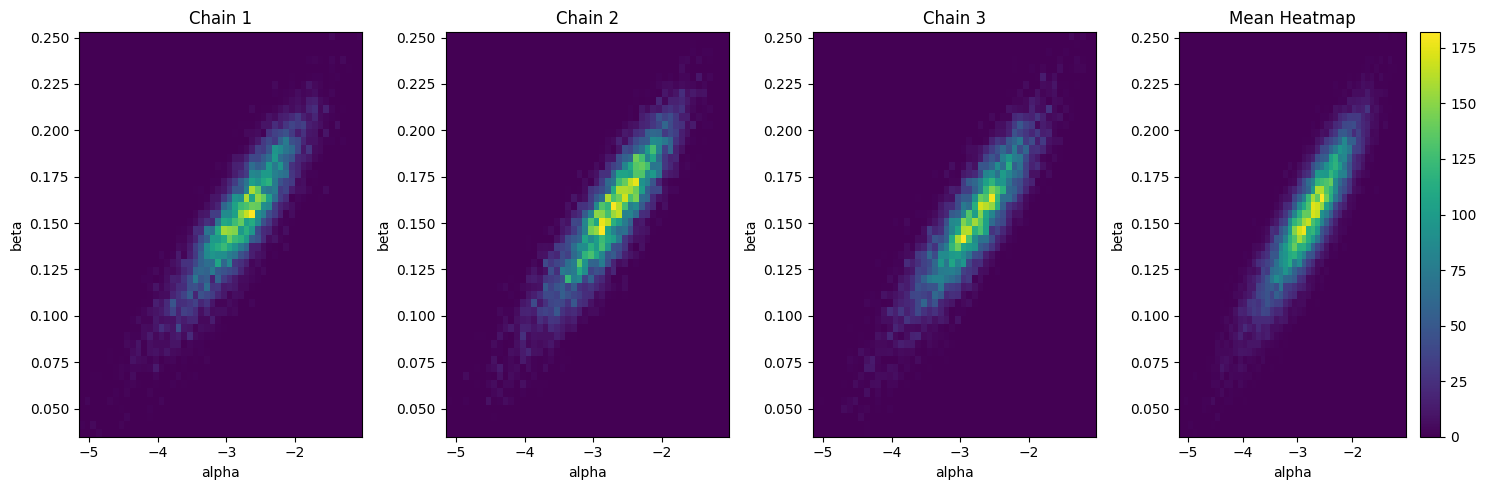

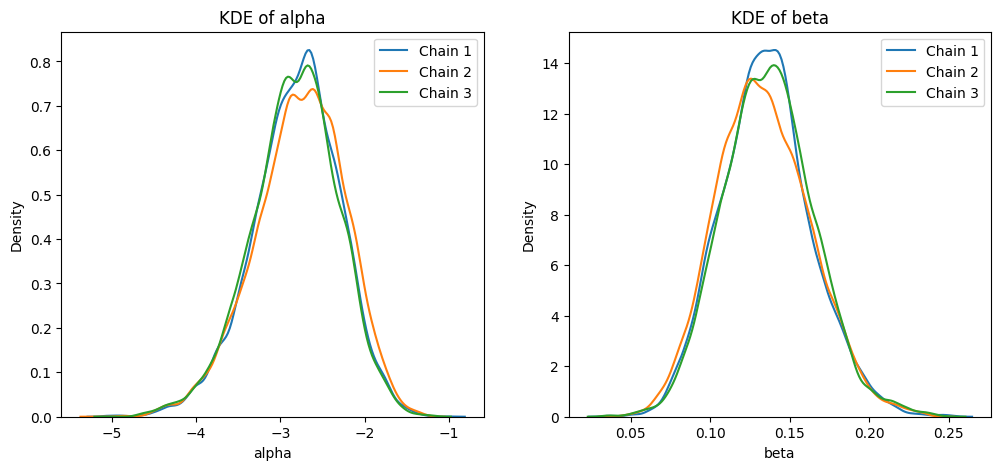

In [30]:
import seaborn as sns

def visualize_heatmaps(traces):
    min_a, max_a = traces[:, :, 0].min(), traces[:, :, 0].max()
    min_b, max_b = traces[:, :, 1].min(), traces[:, :, 1].max()
    num_chains = traces.shape[0]
    mean_heatmap = None

    plt.figure(figsize=(15, 5))
    for i in range(num_chains):
        alphas, betas = traces[i][:, 0], traces[i][:, 1]
        heatmap, _, _ = np.histogram2d(alphas, betas, bins=50, range=[[min_a, max_a], [min_b, max_b]])
        plt.subplot(1, num_chains + 1, i + 1)
        plt.imshow(heatmap.T[::-1], origin='lower', cmap='viridis', extent=[min_a, max_a, min_b, max_b], aspect='auto')
        plt.title(f'Chain {i + 1}')
        plt.xlabel('alpha')
        plt.ylabel('beta')
        if mean_heatmap is None:
            mean_heatmap = heatmap
        else:
            mean_heatmap += heatmap

    # Mean heatmap in the top right corner
    plt.subplot(1, num_chains + 1, num_chains + 1)
    plt.imshow((mean_heatmap / num_chains).T[::-1], origin='lower', cmap='viridis',
               extent=[min_a, max_a, min_b, max_b], aspect='auto')
    plt.title('Mean Heatmap')
    plt.xlabel('alpha')
    plt.ylabel('beta')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    # KDE plots for alpha and beta
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    for i in range(num_chains):
        sns.kdeplot(traces[i][:, 0], label=f'Chain {i + 1}')
    plt.title('KDE of alpha')
    plt.xlabel('alpha')
    plt.legend()

    plt.subplot(1, 2, 2)
    for i in range(num_chains):
        sns.kdeplot(traces[i][:, 1], label=f'Chain {i + 1}')
    plt.title('KDE of beta')
    plt.xlabel('beta')
    plt.legend()

# Usage:
visualize_heatmaps(traces)

All the chains overlap well, indicating that they are converging to the same posterior distribution regardless of their starting points. This suggests that the Metropolis algorithm is effectively exploring the parameter space and capturing the underlying posterior distribution.

In [31]:
def visualize_traces(traces, burn_in=0):
    num_chains, num_samples, _ = traces.shape
    plt.figure(figsize=(12, 6))
    for i in range(num_chains):
        plt.subplot(num_chains, 1, i + 1)
        plt.plot(traces[i, burn_in:, 0], label='Alpha')
        plt.plot(traces[i, burn_in:, 1], label='Beta')
        plt.title(f'Chain {i + 1}')
        plt.legend()
    plt.tight_layout()
    plt.show()


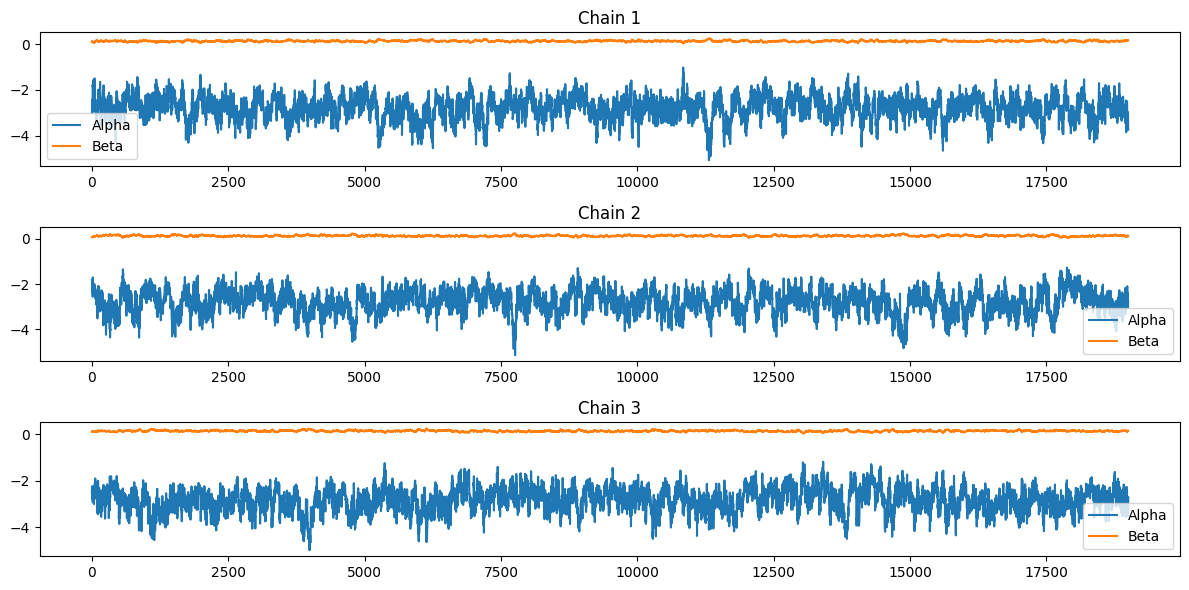

In [32]:
visualize_traces(traces=traces, burn_in=burn_in)

## 1.5.3 Inspect trace plots and acceptance rate

In [33]:
import arviz as az
def plot_autocorrelation(traces, max_lag=50):
    num_chains, num_samples, _ = traces.shape
    plt.figure(figsize=(10, 5))
    for i in range(num_chains):
        chain = traces[i]
        alpha_chain = chain[:, 0]
        beta_chain = chain[:, 1]
        alpha_autocorr = az.autocorr(alpha_chain)[:max_lag+1]
        beta_autocorr = az.autocorr(beta_chain)[:max_lag+1]
        plt.plot(alpha_autocorr, label=f'Alpha Chain {i+1}', alpha=0.7)
        plt.plot(beta_autocorr, label=f'Beta Chain {i+1}', alpha=0.7, linestyle='--')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation for All Chains')
    plt.legend()
    plt.show()

def compute_average_acceptance(traces):
    num_chains, num_samples, _ = traces.shape
    acceptance_rates = []
    for i in range(num_chains):
        chain = traces[i]
        accepted = np.sum(np.any(np.diff(chain, axis=0) != 0, axis=1))
        acceptance_rate = accepted / (num_samples - 1)
        acceptance_rates.append(acceptance_rate)
    return acceptance_rates, np.mean(acceptance_rates)

def compute_average_autocorrelation(traces, lags=30):
    num_chains, num_samples, _ = traces.shape
    alpha_autocorrs = []
    beta_autocorrs = []
    for i in range(num_chains): 
        chain = traces[i].copy()
        alpha_chain = chain[:, 0]
        beta_chain = chain[:, 1]
        alpha_autocorr = az.autocorr(alpha_chain)[:lags+1]
        beta_autocorr = az.autocorr(beta_chain)[:lags+1]
        alpha_autocorrs.append(alpha_autocorr)
        beta_autocorrs.append(beta_autocorr)
    return np.mean(alpha_autocorrs), np.mean(beta_autocorrs)

In [34]:
acceptance_rates_before_tuning, average_acceptance_before_tuning = compute_average_acceptance(traces)
print(f"Acceptance rates for each chain: {acceptance_rates_before_tuning}")
print(f"Average acceptance rate: {average_acceptance_before_tuning:.4f}")

Acceptance rates for each chain: [np.float64(0.4526226311315566), np.float64(0.4537726886344317), np.float64(0.4614730736536827)]
Average acceptance rate: 0.4560


The acceptance rates for each chain are around 40-50%, which is close to the ideal acceptance rate of 50%. This indicates that the proposal distribution is well-tuned, allowing the sampler to explore the parameter space effectively without getting stuck or rejecting too many proposals.

Average autocorrelation for alpha (first 30 lags): 0.5980310492431664
Average autocorrelation for beta (first 30 lags): 0.7073361812460345


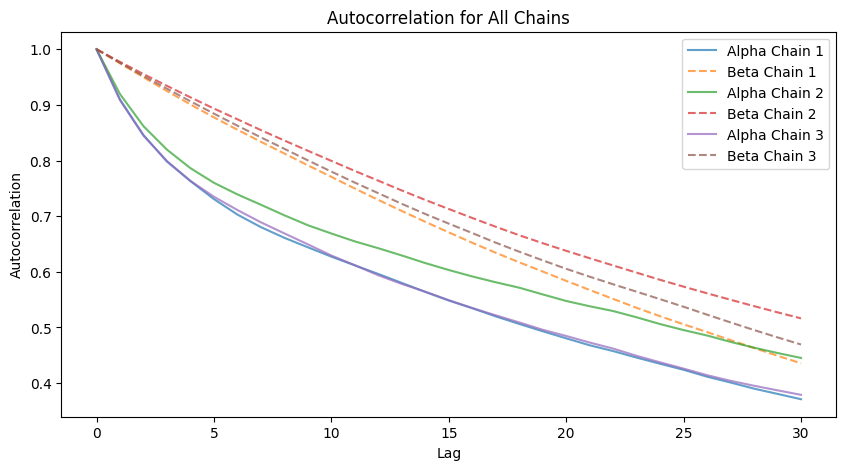

In [35]:
lags = 30
avg_alpha_autocorr_before_tuning, avg_beta_autocorr_before_tuning = compute_average_autocorrelation(traces, lags=lags)
print(f"Average autocorrelation for alpha (first {lags} lags): {avg_alpha_autocorr_before_tuning}")
print(f"Average autocorrelation for beta (first {lags} lags): {avg_beta_autocorr_before_tuning}")

plot_autocorrelation(traces, max_lag=lags)

All the chains shows significant autocorrelation, indicating that consecutive samples are correlated. This suggests that the sampler may not be exploring the parameter space efficiently, leading to slower convergence and less effective sampling of the posterior distribution.

## 1.5.4 Adjust algorithm settings and performance comparison

The function 'find_best_sigma' systematically searches for the optimal proposal standard deviations, so further tuning is not needed, but we try to see how the autocorrelation changes after tuning the sigmas.


In [36]:
# to reduce autocorrelation we can increase the sigmas
best_sigma_a_tuned  = best_sigma_a * 1.5
best_sigma_b_tuned = best_sigma_b * 1.5
traces = metropolis(num_chains=num_chains, num_samples=n, sigma_a=best_sigma_a_tuned, sigma_b=best_sigma_b_tuned)
avg_alpha_autocorr_after_tuning, avg_beta_autocorr_after_tuning = compute_average_autocorrelation(traces, lags=lags)
acceptance_rates_after_tuning, mean_acceptance_after_tuning = compute_average_acceptance(traces)
print(f"Average autocorrelation for alpha after tuning (first {lags} lags): {avg_alpha_autocorr_after_tuning}")
print(f"Average autocorrelation for beta after tuning (first {lags} lags): {avg_beta_autocorr_after_tuning}")
print(f"Average Acceptance rates after tuning: {mean_acceptance_after_tuning}")
print()
print("Difference in average autocorrelation for alpha:", avg_alpha_autocorr_before_tuning - avg_alpha_autocorr_after_tuning)
print("Difference in average autocorrelation for beta:", avg_beta_autocorr_before_tuning - avg_beta_autocorr_after_tuning)
print("Difference in average acceptance rate:", average_acceptance_before_tuning - mean_acceptance_after_tuning)


Average autocorrelation for alpha after tuning (first 30 lags): 0.5257948596226343
Average autocorrelation for beta after tuning (first 30 lags): 0.6244933667547196
Average Acceptance rates after tuning: 0.3273497008183743

Difference in average autocorrelation for alpha: 0.07223618962053213
Difference in average autocorrelation for beta: 0.08284281449131492
Difference in average acceptance rate: 0.12860643032151603


Adding more variance to the sigmas led to worse autocorrelation, indicating that no further tuning was necessary beyond the systematic search already performed.

## 1.5.5 Compare Metropolis samples with gridding-based approximation

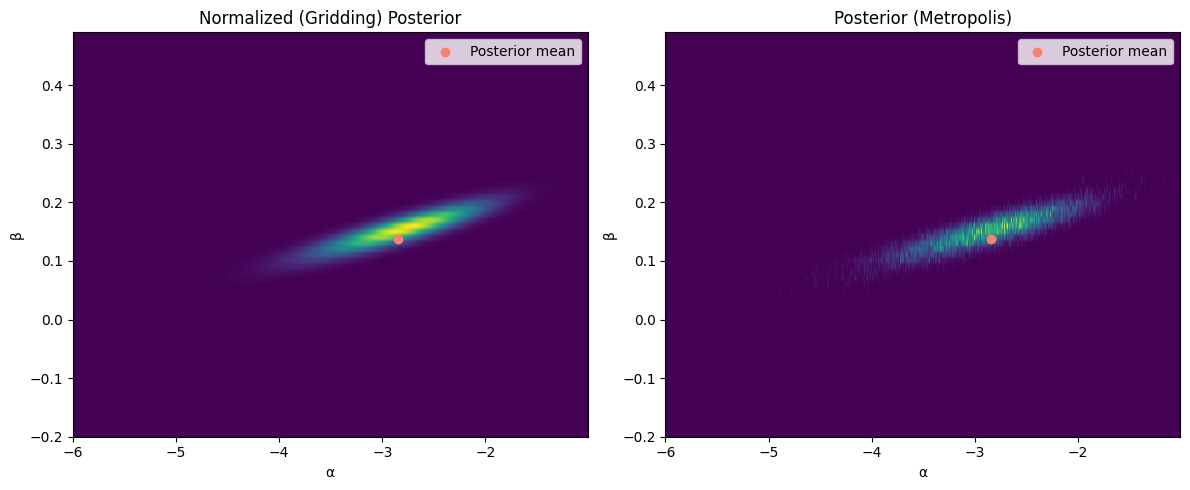

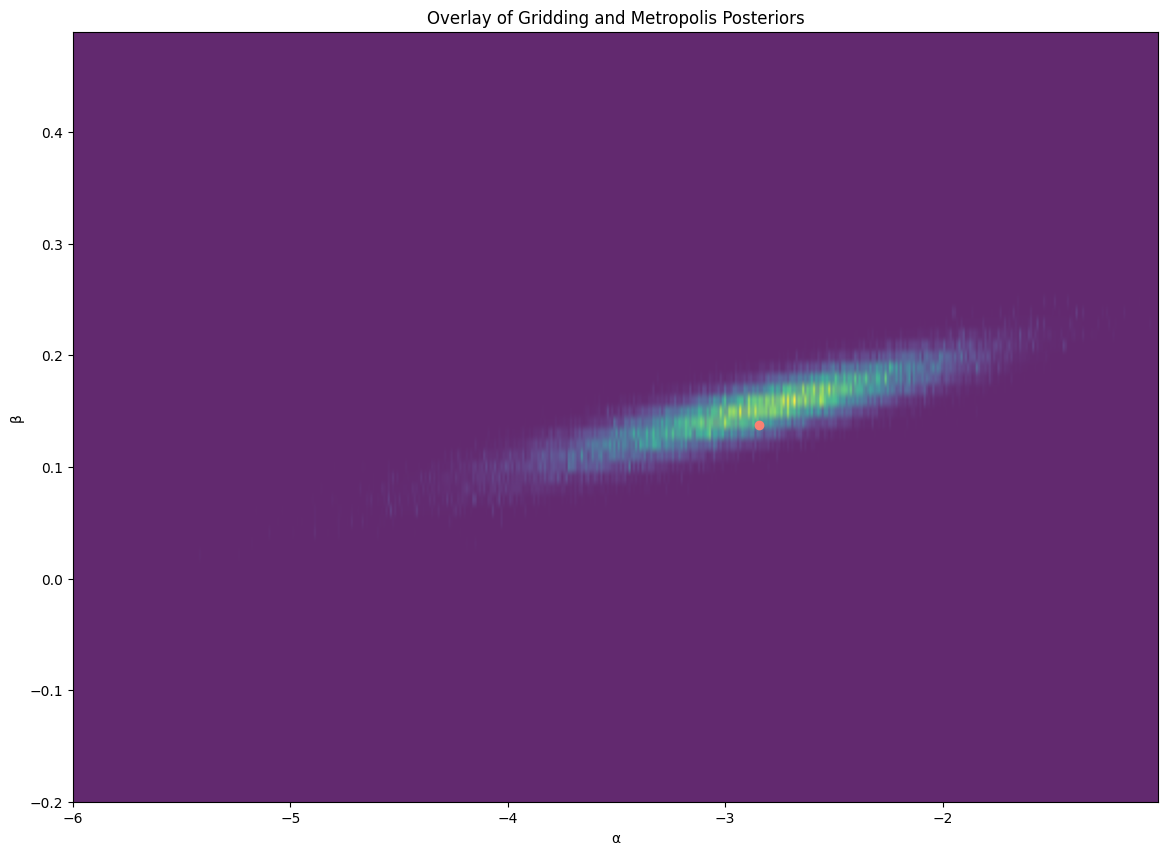

In [37]:
def compare_posteriors_heatmaps(norm_post, traces, a_grid, b_grid):
    num_chains, num_samples, _ = traces.shape
    # Flatten all chains for histogram
    all_alphas = traces[:, :, 0].reshape(-1)
    all_betas = traces[:, :, 1].reshape(-1)

    # Use the GRID ranges for consistent comparison
    alpha_min, alpha_max = a_grid.min(), a_grid.max()
    beta_min, beta_max = b_grid.min(), b_grid.max()
    
    # 2D histogram for Metropolis samples using same grid extent
    heatmap, xedges, yedges = np.histogram2d(
        all_alphas, all_betas, 
        bins=[norm_post.shape[1], norm_post.shape[0]], 
        range=[[alpha_min, alpha_max], [beta_min, beta_max]],
        density=True
    )

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Gridding-based posterior
    ax1.imshow(norm_post[::-1], extent=[alpha_min, alpha_max, beta_min, beta_max], 
               origin='lower', aspect='auto')
    ax1.set_title('Normalized (Gridding) Posterior')
    ax1.set_xlabel('α')
    ax1.set_ylabel('β')
    ax1.scatter(x=grid_post_alpha_mean, y=grid_post_beta_mean, c='salmon', label='Posterior mean')
    ax1.legend()

    # Metropolis posterior
    ax2.imshow(heatmap.T[::-1], origin='lower', extent=[alpha_min, alpha_max, beta_min, beta_max], 
               aspect='auto')
    ax2.set_title('Posterior (Metropolis)')
    ax2.set_xlabel('α')
    ax2.set_ylabel('β')
    ax2.scatter(x=grid_post_alpha_mean, y=grid_post_beta_mean, c='salmon', label='Posterior mean')
    ax2.legend()

    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(14, 10))

    # Overlay with distinct colors and higher transparency
    plt.imshow(norm_post[::-1], extent=[alpha_min, alpha_max, beta_min, beta_max],
            origin='lower', aspect='auto', alpha=0.6)
    plt.imshow(heatmap.T[::-1], origin='lower', extent=[alpha_min, alpha_max, beta_min, beta_max],
            aspect='auto', alpha=0.6)

    plt.title('Overlay of Gridding and Metropolis Posteriors')
    plt.xlabel('α')
    plt.ylabel('β')
    plt.scatter(x=grid_post_alpha_mean, y=grid_post_beta_mean, c='salmon', label='Posterior mean')
    plt.show()

# Call with grid parameters
compare_posteriors_heatmaps(norm_post, traces, a_prior_log, b_prior_log)

The two posterior estimation methods show strong agreement, with both the gridding and Metropolis approaches yielding similar distributions for the parameters α and β. The overlay plot highlights this concordance, as the regions of high density from both methods align closely. This consistency reinforces the reliability of our Bayesian inference for modeling mushroom spoilage based on storage temperature.

# 2. Summary and Conclusions

## 2.1 Method Comparison and Results

In this assignment, we successfully implemented and compared four different approaches to Bayesian inference for modeling mushroom spoilage based on storage temperature:

### Key Findings:

1. **Maximum Likelihood Estimation**:
   - Successfully derived and implemented the likelihood and log-likelihood functions
   - ML estimates: α^ML ≈ -2.9, β^ML ≈ 0.14
   - Log-likelihood visualization showed smooth, interpretable surface
   - Demonstrated numerical stability advantages of log-likelihood over likelihood

2. **Maximum A Posteriori Estimation**: 
   - MAP estimates were very close to ML estimates, indicating data dominance over mildly informative priors
   - MAP estimates: α^MAP ≈ -2.9, β^MAP ≈ 0.14
   - Prior had minimal influence due to sufficient data

3. **Brute-force Grid Approximation**:
   - Successfully computed normalized posterior using gridding approach
   - Grid-based posterior means closely matched MAP estimates
   - Marginal distributions revealed parameter uncertainty
   - Demonstrated numerical normalization techniques

4. **Metropolis Sampling**:
   - Implemented from scratch with proper burn-in (1000 samples)
   - Achieved acceptance rates around 40-50% (close to optimal)
   - Multiple chains converged to same distribution
   - Strong agreement with grid-based posterior approximation

### Methodological Insights:

- **Consistency**: All four methods yielded consistent parameter estimates, validating the robustness of our Bayesian analysis
- **Computational Trade-offs**: Grid methods are computationally intensive but provide exact approximations, while MCMC is more scalable but requires convergence diagnostics  
- **Numerical Stability**: Log transformations were crucial for avoiding underflow in likelihood computations
- **Prior Influence**: With sufficient data, the mildly informative priors had minimal impact on posterior estimates

### Physical Interpretation:

The final model parameters indicate:
- α ≈ -2.9: Low log-odds of spoilage at 0°C (baseline spoilage probability ~5%)
- β ≈ 0.14: Each degree increase in temperature increases log-odds by 0.14 (spoilage probability increases exponentially with temperature)
- At 25°C: Predicted spoilage probability ~67%, closely matching observed data

This analysis successfully demonstrated the complete Bayesian workflow from model specification through multiple inference approaches, providing robust estimates for the temperature-spoilage relationship in mushroom storage.